In [4]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (320 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB

[0, 0.1, 0.4, 0.8, 1.0]
[0.9208615  0.12070083 0.23672663 0.30846332]


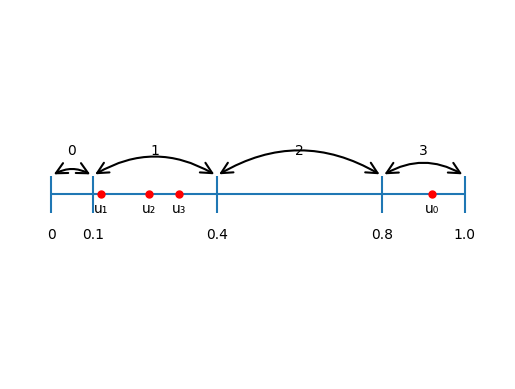

In [112]:

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np


weights = [0.1,0.3,0.4,0.2]
n = len(weights)
cdf = [0,weights[0]]
for w in weights[1:]:
    cdf.append(cdf[-1]+w)

# Dictionary for subscript mapping
subscript_map = {
    '0': '\u2080', '1': '\u2081', '2': '\u2082', '3': '\u2083', '4': '\u2084',
    '5': '\u2085', '6': '\u2086', '7': '\u2087', '8': '\u2088', '9': '\u2089'
}

def make_subscript(text):
    return ''.join(subscript_map.get(char, char) for char in text)

print(cdf)


xmin = 0
xmax = 1
y = 0.5
height = 0.1


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,1)
plt.hlines(y,xmin,xmax)
for c in cdf:
    plt.vlines(c, y - height / 2., y + height / 2.)
    plt.text(c,y-0.12,f'{c}',horizontalalignment='center')

U = np.random.rand((n))
print(U)
for i,u in enumerate(U):
    plt.plot(u,y, 'ro', ms = 5, mfc = 'r')
    plt.text(u,y-0.05,f"u{make_subscript(f'{i}')}", horizontalalignment='center')

plt.axis('off')

y_curly = 0.2
for i,c in enumerate(cdf[1:]):
    start = cdf[i]
    end = cdf[i+1]
    ycurly = 0.55
    bracket = FancyArrowPatch(
        (start, ycurly), (end,ycurly),
        connectionstyle="arc3,rad=-0.3",
        arrowstyle="<->",
        mutation_scale=20,
        lw=1.5,
        color = 'black')
    ax.add_patch(bracket)
    midpoint = (start+end) / 2
    ax.text(midpoint,0.6,f'{i}',ha='center',va='bottom')